In [14]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np

output = pd.read_csv('./output/output.csv', header=None)
output[1] = ndimage.median_filter(output[1],size=25,mode='nearest')

In [24]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np

def postprocessing(csvName,savePath):
    output = pd.read_csv(csvName, header=None)
    for batch in range (3):
        output[1] = ndimage.median_filter(output[1],size=20,mode='nearest')
        first=0
        for video_name in range(1,11):
            tmp = output[output[0]==video_name][1].reset_index()
            count = 0
            start = 0
            stack = []
            end = 1
            idx = 0
            for i in range(0,len(tmp[1])-1):
                if i == 0 :
                    tmp[1][i] = tmp[1][i+1]
                    count += 1
                    value = tmp[1][i+1]
                    continue
                elif i == len(tmp[1])-1 :
                    tmp[1][i] = tmp[1][i-1]
                    break
                if tmp[1][i] == tmp[1][i-1]:
                    count += 1
                    end = i
                    continue
                else :
                    stack.append([idx,value,count,[start,end]])
                    start = i
                    value = tmp[1][i]
                    end = i
                    idx += 1
                    count = 0
            
            for idx,value, count, lens in stack:
                if idx == 0 :
                    if count <= 28 :
                        tmp[1][lens[0]:lens[1]+1] = stack[idx+1][1]
                        continue
                if idx == len(stack)-1 :
                    if count <= 28 :
                        tmp[1][lens[0]:lens[1]+1] = stack[idx-1][1]      
                        continue

                if count <= 28 :
                    if stack[idx-1][2] > stack[idx+1][2]:
                        tmp[1][lens[0]:lens[1]+1] = stack[idx-1][1]
                    else :
                        tmp[1][lens[0]:lens[1]+1] = stack[idx+1][1]
            output[1][first:first+len(tmp)] = tmp[1]
            first = first + len(tmp)
            
    output.to_csv(savePath,index=False)

In [25]:
postprocessing('./output/output.csv','tmp.csv')

In [16]:
def grapher(video_name,name):
    take_1 = name[0] == video_name
    x = name[take_1][2]
    y = name[take_1][1]
    return x, y
def showGraph(name):
    f, axes = plt.subplots(10,1)
    f.set_size_inches(25,60)
    for i in range(0,10):
        x,y = grapher(i+1,name)
        axes[i].set_title(f"video_name: {i+1}")
        axes[i].set_ylim([0,17])
        axes[i].plot(x,y)
        axes[i].scatter(x,y,linestyle='solid',color='red')
    plt.show()

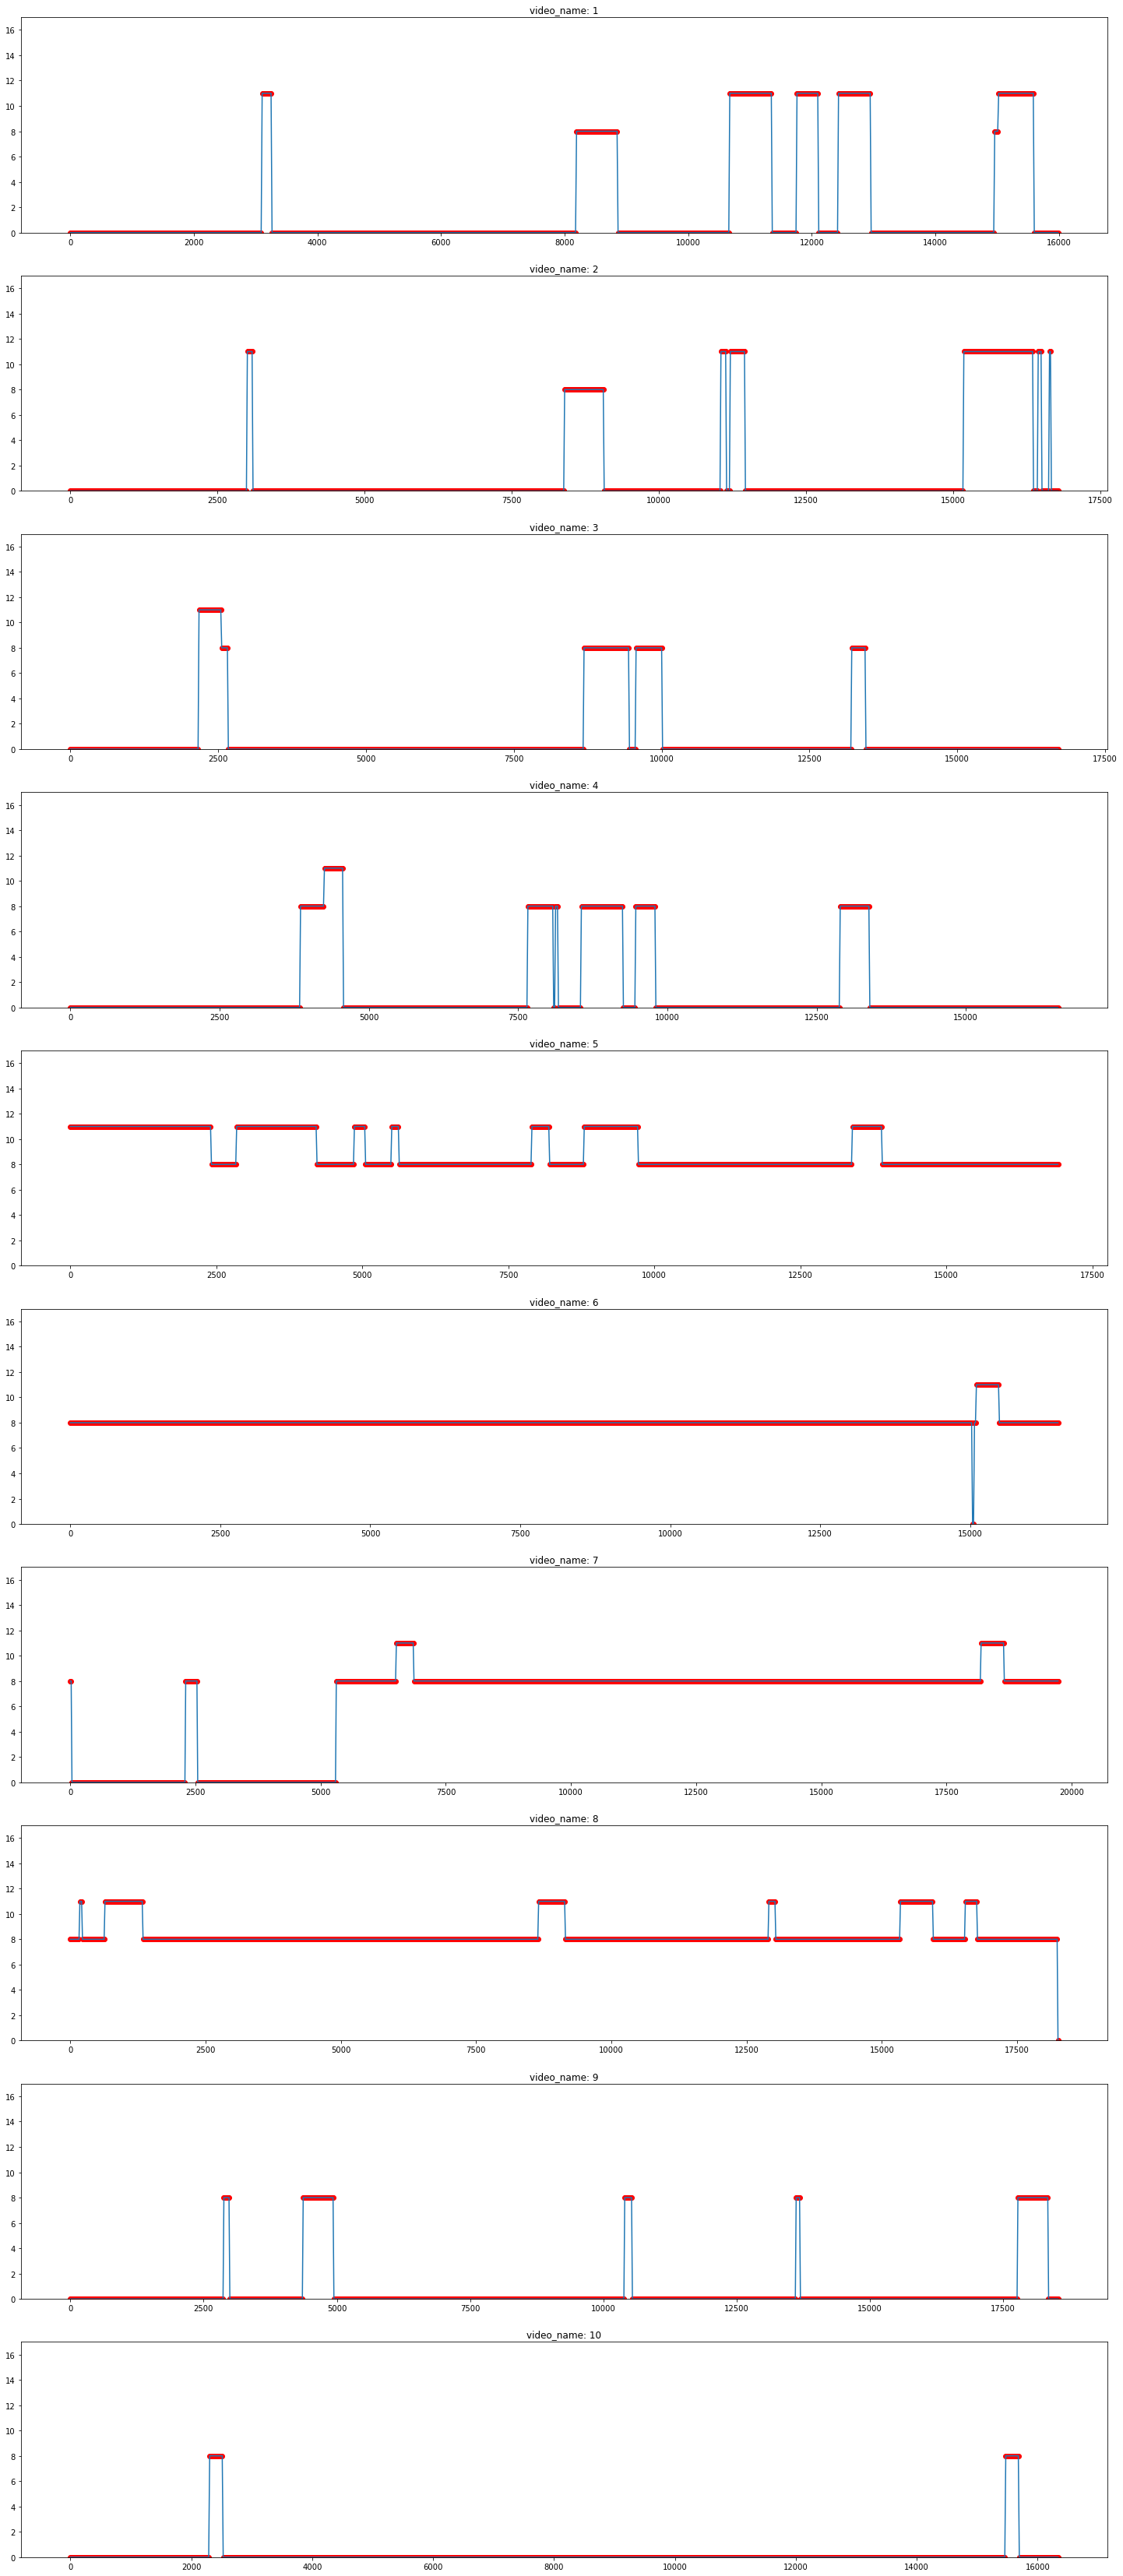

In [17]:
showGraph(output)

In [18]:
first=0
for video_name in range(1,11):
    tmp = output[output[0]==video_name][1].reset_index()
    count = 0
    start = 0
    stack = []
    end = 1
    idx = 0
    for i in range(0,len(tmp[1])-1):
        if i == 0 :
            tmp[1][i] = tmp[1][i+1]
            count += 1
            value = tmp[1][i+1]
            continue
        elif i == len(tmp[1])-1 :
            tmp[1][i] = tmp[1][i-1]
            break
        if tmp[1][i] == tmp[1][i-1]:
            count += 1
            end = i
            continue
        else :
            stack.append([idx,value,count,[start,end]])
            start = i
            value = tmp[1][i]
            end = i
            idx += 1
            count = 0
    
    for idx,value, count, lens in stack:
        if idx == 0 :
            if count <= 28 :
                tmp[1][lens[0]:lens[1]+1] = stack[idx+1][1]
                continue
        if idx == len(stack)-1 :
            if count <= 28 :
                tmp[1][lens[0]:lens[1]+1] = stack[idx-1][1]      
                continue

        if count <= 28 :
            if stack[idx-1][2] > stack[idx+1][2]:
                tmp[1][lens[0]:lens[1]+1] = stack[idx-1][1]
            else :
                tmp[1][lens[0]:lens[1]+1] = stack[idx+1][1]
    output[1][first:first+len(tmp)] = tmp[1]
    first = first + len(tmp)
        

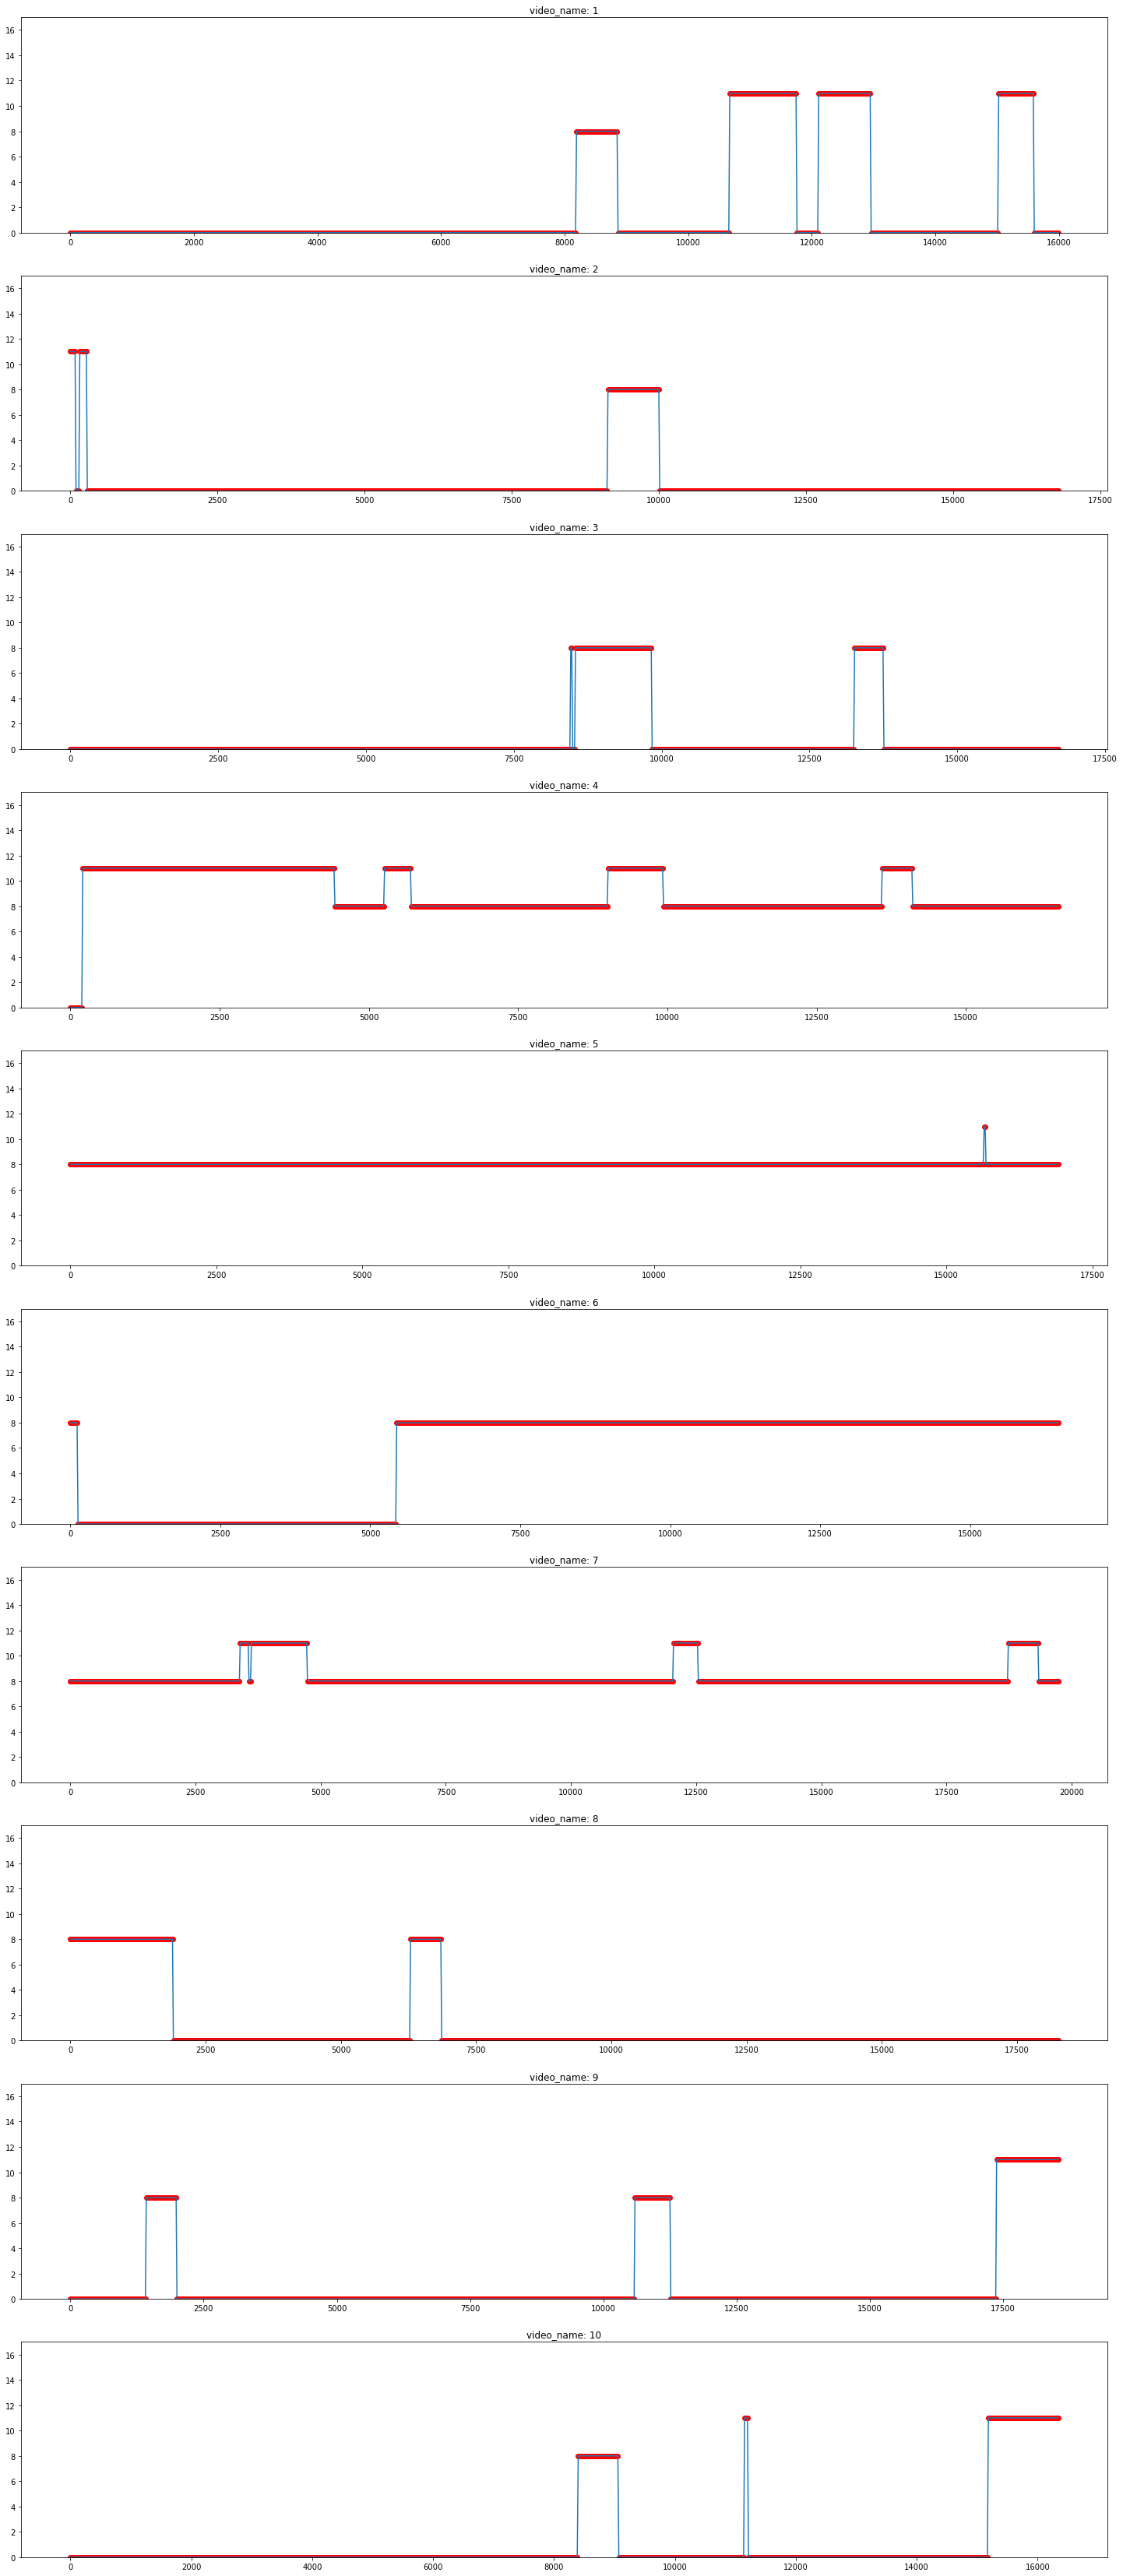

In [19]:
showGraph(output)

In [43]:
csvsss.to_csv('./output_proprecessing.csv',index=False)